# MDS

- 使用美国各大城市距离数据CITY_DISTANCE

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)
pd.DataFrame(similarities)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,3.605551,11.401754,6.082763,3.000000,13.453624,11.401754,7.071068,8.246211,9.219544,11.180340,11.401754,8.544004,15.000000,6.324555,13.038405,10.440307,15.033296,6.403124,12.083046
1,3.605551,0.000000,14.866069,9.486833,6.324555,14.422205,14.035669,9.219544,6.082763,12.083046,14.000000,12.206556,11.045361,16.552945,9.433981,16.643317,8.000000,18.027756,7.615773,14.317821
2,11.401754,14.866069,0.000000,8.062258,9.848858,19.104973,12.649111,8.246211,19.235384,5.000000,11.704700,18.000000,12.041595,18.681542,5.830952,4.472136,21.470911,12.806248,14.317821,14.560220
3,6.082763,9.486833,8.062258,0.000000,3.162278,11.401754,6.403124,9.219544,12.041595,8.944272,5.830952,10.049876,4.472136,11.661904,6.403124,7.810250,14.212670,9.219544,6.324555,7.810250
4,3.000000,6.324555,9.848858,3.162278,0.000000,11.661904,8.544004,8.062258,9.433981,9.055385,8.246211,9.848858,5.830952,12.727922,6.082763,10.630146,11.661904,12.041595,5.099020,9.433981
5,13.453624,14.422205,19.104973,11.401754,11.661904,0.000000,7.280110,19.723083,11.180340,20.248457,8.246211,2.236068,7.071068,3.162278,17.464249,17.117243,12.000000,10.816654,7.071068,5.385165
6,11.401754,14.035669,12.649111,6.403124,8.544004,7.280110,0.000000,15.620499,13.928388,15.000000,1.000000,7.211103,3.000000,6.082763,12.727922,10.000000,15.652476,4.472136,7.280110,2.000000
7,7.071068,9.219544,8.246211,9.219544,8.062258,19.723083,15.620499,0.000000,15.033296,3.605551,15.000000,17.888544,13.453624,20.615528,3.162278,12.000000,17.117243,17.888544,13.000000,16.970563
8,8.246211,6.082763,19.235384,12.041595,9.433981,11.180340,13.928388,15.033296,0.000000,17.464249,14.317821,9.055385,11.180340,14.035669,14.560220,19.849433,2.236068,18.384776,6.708204,13.341664
9,9.219544,12.083046,5.000000,8.944272,9.055385,20.248457,15.000000,3.605551,17.464249,0.000000,14.212670,18.681542,13.416408,20.591260,3.000000,9.219544,19.646883,16.401219,14.142136,16.643317


In [2]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

In [3]:
# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

In [4]:
# Rotate the data
pca = PCA(n_components=2)
X_true = pca.fit_transform(X_true)

pos = pca.fit_transform(pos)

npos = pca.fit_transform(npos)



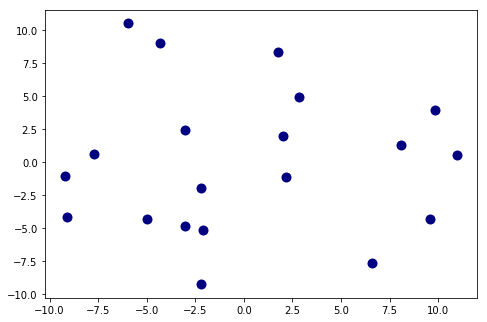

In [5]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')

plt.show()

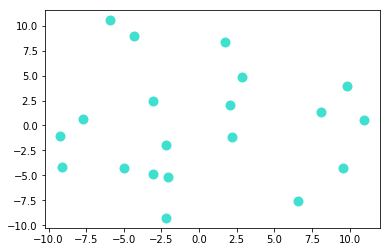

In [6]:
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')

plt.show()

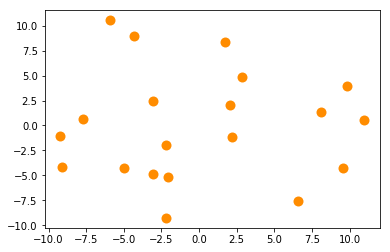

In [7]:
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.show()